<a href="https://colab.research.google.com/github/ebernardino01/DataAnalystPortfolio/blob/main/Olist/Olist_Data_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Olist Data Analysis Notebook

## Installing and importing libraries

In [1]:
# Install geopandas and dependencies
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import geopandas as gpd
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 39.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 1.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Reading the data from source

In [2]:
# Set no limit on column display
pd.set_option('display.max_columns', None)

In [3]:
# Load customers dataset
df_customers = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1K8S3d4ghfwTUnHnFNtfwzPSlbOCAYmBX'
)
print(df_customers.shape)
df_customers.info()

(99441, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [4]:
# Load geolocation dataset
df_location = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1Dvp32qN3L5vQ37RQ4AnP2vxEJIN6o56k'
)
print(df_location.shape)
df_location.info()

(1000163, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [5]:
# Load order items dataset
df_items = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=17R4g7Pw6iDbN8MtGVbqEm1s-EwjFQHfH'
)
print(df_items.shape)
df_items.info()

(112650, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [6]:
# Load order payments dataset
df_payments = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1oHTHEbSs0kI7IXFmyrJirBS5q7Dtvzid'
)
print(df_payments.shape)
df_payments.info()

(103886, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [7]:
# Load order reviews dataset
df_reviews = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1MUWnT3gDWlKbqfZTlJQHbJtEVrWy7A2k'
)
print(df_reviews.shape)
df_reviews.info()

(99224, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [8]:
# Load orders dataset
df_orders = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1bK1h1zK5kb_cLPelX3YX_GhMd_WWjEH6'
)
print(df_orders.shape)
df_orders.info()

(99441, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [9]:
# Load products dataset
df_products = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1UOo3BIFoOhSrsXRPXIU5ei8331_6XyiH'
)
print(df_products.shape)
df_products.info()

(32951, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [10]:
# Load sellers dataset
df_sellers = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1HHk9jU7oTznJNuS1nEecZamHOY-t4wly'
)
print(df_sellers.shape)
df_sellers.info()

(3095, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [11]:
# Load translations dataset
df_trans = pd.read_csv(
    'https://drive.google.com/uc?export=download&id=1zsNS-XwZLWs_eczy1CKLLysl4HB0TFQl'
)
print(df_trans.shape)
df_trans.info()

(71, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


## Cleaning and transforming the raw dataset

In [12]:
# Transform the column values in the customers dataset
df_customers['customer_city'] = df_customers['customer_city'].str.title()
df_customers = df_customers.rename(
    columns={
        'customer_zip_code_prefix': 'zip_code_prefix'
    }
)
df_customers.head()

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Sao Paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Mogi Das Cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Campinas,SP


In [13]:
# Check for duplicate rows in the location dataset
df_location[df_location.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [14]:
# Remove the duplicates
df_location.drop_duplicates(inplace=True)
print(df_location.shape)

(738332, 5)


In [15]:
# Transform the column values in the geolocation dataset
df_location['geolocation_city'] = df_location['geolocation_city'].str.title()
df_location = df_location.rename(
    columns={
        'geolocation_zip_code_prefix': 'zip_code_prefix'
    }
)
df_location.head()

,zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Sao Paulo,SP
1,1046,-23.546081,-46.644820,Sao Paulo,SP
2,1046,-23.546129,-46.642951,Sao Paulo,SP
3,1041,-23.544392,-46.639499,Sao Paulo,SP
4,1035,-23.541578,-46.641607,Sao Paulo,SP


In [16]:
# Determine outliers from the geolocation latitude
df_location['geolocation_lat'].describe()

count    738332.000000
mean        -20.998353
std           5.892315
min         -36.605374
25%         -23.603061
50%         -22.873588
75%         -19.923336
max          45.065933
Name: geolocation_lat, dtype: float64

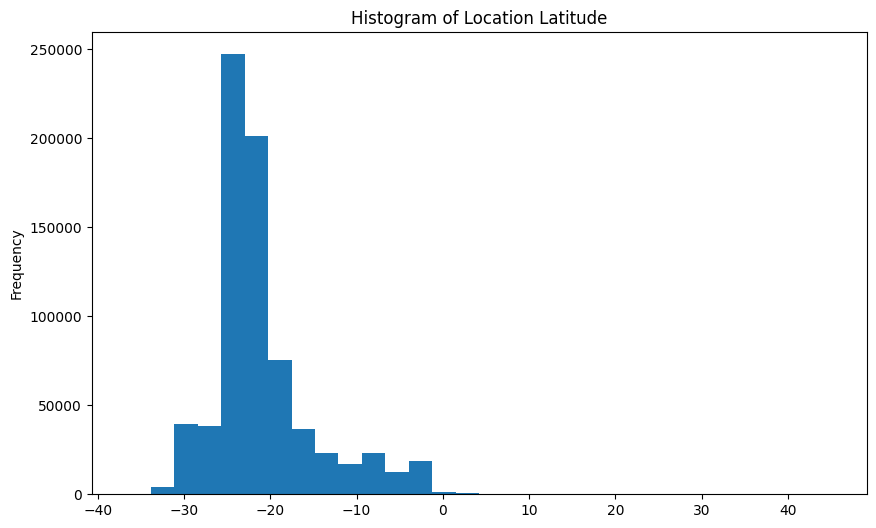

In [17]:
# Plot a histogram to visualize latitude distribution
fig, ax = plt.subplots(figsize=(10, 6))
ax = df_location['geolocation_lat'].plot(kind='hist', bins=30)
ax.set_title('Histogram of Location Latitude')
plt.show()

In [18]:
# Filter values outside of three sigma
min_range = df_location['geolocation_lat'].mean() - \
    (3 * df_location['geolocation_lat'].std())
max_range = df_location['geolocation_lat'].mean() + \
    (3 * df_location['geolocation_lat'].std())
print(min_range, max_range)
df_location = df_location[
    (df_location['geolocation_lat'] >= min_range) &
    (df_location['geolocation_lat'] <= max_range)
]
df_location['geolocation_lat'].describe()

-38.67529710903493 -3.3214096783634552


count    725088.000000
mean        -21.349806
std           5.328018
min         -36.605374
25%         -23.608894
50%         -22.888725
75%         -19.968186
max          -3.321772
Name: geolocation_lat, dtype: float64

In [19]:
# Determine outliers from the geolocation longitude
df_location['geolocation_lng'].describe()

count    725088.000000
mean        -46.403747
std           4.333015
min         -72.930746
25%         -48.838142
50%         -46.642442
75%         -43.782804
max         -32.402779
Name: geolocation_lng, dtype: float64

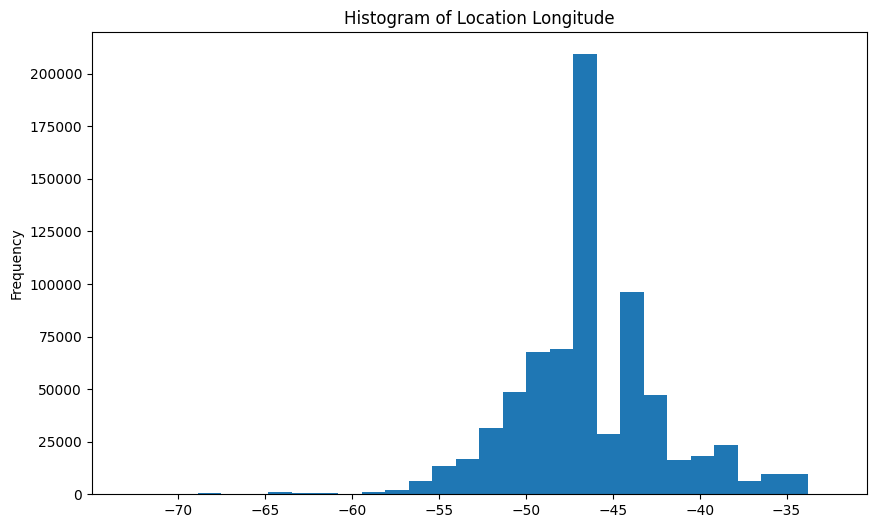

In [20]:
# Plot a histogram to visualize longitude distribution
fig, ax = plt.subplots(figsize=(10, 6))
ax = df_location['geolocation_lng'].plot(kind='hist', bins=30)
ax.set_title('Histogram of Location Longitude')
plt.show()

In [21]:
# Filter values outside of three sigma
min_range = df_location['geolocation_lng'].mean() - \
    (3 * df_location['geolocation_lng'].std())
max_range = df_location['geolocation_lng'].mean() + \
    (3 * df_location['geolocation_lng'].std())
print(min_range, max_range)
df_location = df_location[
    (df_location['geolocation_lng'] >= min_range) &
    (df_location['geolocation_lng'] <= max_range)
]
df_location['geolocation_lng'].describe()

-59.402793759154605 -33.404700840793524


count    721130.000000
mean        -46.305978
std           4.131153
min         -59.367531
25%         -48.766718
50%         -46.639018
75%         -43.766088
max         -34.793685
Name: geolocation_lng, dtype: float64

In [22]:
# Quickly inspect the location dataset after removing the outliers
df_location.shape

(721130, 5)

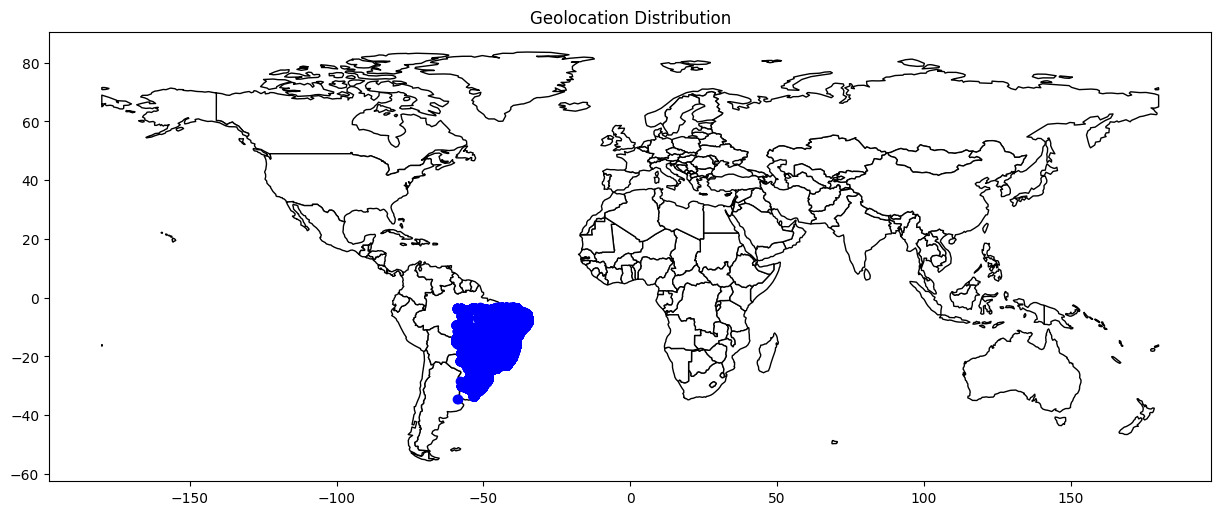

In [23]:
# Plot the geolocation coordinates
gdf = gpd.GeoDataFrame(
    df_location,
    geometry=gpd.points_from_xy(
        df_location['geolocation_lng'],
        df_location['geolocation_lat']
    )
)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world['continent'] != 'Antarctica'].plot(
    figsize=(15, 15),
    color='white',
    edgecolor='black'
)
ax.set_title('Geolocation Distribution')
gdf.plot(ax=ax, color='blue')
plt.show()

In [24]:
# Convert order item dates into datetime type
df_items['shipping_limit_date'] = pd.to_datetime(
    df_items['shipping_limit_date']
)
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [25]:
# Transform the column values in the payments dataset
df_payments['payment_type'] = df_payments['payment_type'].str.title()
df_payments['payment_type'].replace(
    '_', ' ', regex=True, inplace=True
)
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,Credit Card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,Credit Card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,Credit Card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,Credit Card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,Credit Card,2,128.45


In [26]:
# Transform the column values in the orders dataset
df_orders['order_status'] = df_orders['order_status'].str.title()
print(df_orders['order_status'].unique())

# Convert order dates into datetime type
df_orders['order_purchase_timestamp'] = pd.to_datetime(
    df_orders['order_purchase_timestamp']
)
df_orders['order_approved_at'] = pd.to_datetime(
    df_orders['order_approved_at']
)
df_orders['order_delivered_carrier_date'] = pd.to_datetime(
    df_orders['order_delivered_carrier_date']
)
df_orders['order_delivered_customer_date'] = pd.to_datetime(
    df_orders['order_delivered_customer_date']
)
df_orders['order_estimated_delivery_date'] = pd.to_datetime(
    df_orders['order_estimated_delivery_date']
)
df_orders.info()

['Delivered' 'Invoiced' 'Shipped' 'Processing' 'Unavailable' 'Canceled'
 'Created' 'Approved']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [27]:
# Transform the column values in the sellers dataset
df_sellers['seller_city'] = df_sellers['seller_city'].str.title()
df_sellers = df_sellers.rename(
    columns={
        'seller_zip_code_prefix': 'zip_code_prefix'
    }
)
df_sellers.head()

,seller_id,zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,Mogi Guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Rio De Janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Sao Paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Braganca Paulista,SP


In [28]:
# Transform the English values in the translations dataset
df_trans['product_category_name_english'] = \
    df_trans['product_category_name_english'].str.title()
df_trans['product_category_name_english'].replace(
    '_', ' ', regex=True, inplace=True
)

# Merge the translations with the products using the English category name
df_prod_trans = pd.merge(
    df_products[['product_id', 'product_category_name']],
    df_trans[['product_category_name', 'product_category_name_english']],
    on=['product_category_name'],
    how='inner'
)

# Retain the English category name column
df_prod_trans.drop(['product_category_name'], axis=1, inplace=True)
df_prod_trans = df_prod_trans.rename(
    columns={
        'product_category_name_english': 'product_category_name'
    }
)
df_prod_trans.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,Perfumery
2,0d009643171aee696f4733340bc2fdd0,Perfumery
3,b1eae565a61935e0011ee7682fef9dc9,Perfumery
4,8da90b37f0fb171b4877c124f965b1f6,Perfumery


## Exploring of data for insights and visualizations

We will look first into the company's statistics in general.

The related dataframes will be merged in order to come up with a more meaningful dataset to be used for our findings later.

In [29]:
# Create columns for order purchase month and year
df_orders['order_purchase_year'] = \
    df_orders['order_purchase_timestamp'].dt.strftime('%Y').astype('int64')
df_orders['order_purchase_month'] = \
    df_orders['order_purchase_timestamp'].dt.strftime('%b')

# Merge the orders, order items, customers, sellers and product datasets
df_ord_item = df_orders.merge(
    df_items,
    on=['order_id'],
    how='left'
)
df_ord_item_cust = df_ord_item.merge(
    df_customers,
    on=['customer_id'],
    how='left'
)
df_ord_item_cust_sell = df_ord_item_cust.merge(
    df_sellers,
    on=['seller_id'],
    how='left'
)
df_ord_item_cust_sell_prod = df_ord_item_cust_sell.merge(
    df_prod_trans,
    on=['product_id'],
    how='left'
)

# Rename columns
df_ord_item_cust_sell_prod = df_ord_item_cust_sell_prod.rename(
    columns={
        'zip_code_prefix_x': 'customer_zip_code_prefix',
        'zip_code_prefix_y': 'seller_zip_code_prefix'
    }
)

# Drop columns
drop_cols = ['order_item_id']
df_ord_item_cust_sell_prod.drop(
    drop_cols,
    axis=1,
    inplace=True
)
df_ord_item_cust_sell_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113425 entries, 0 to 113424
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   order_approved_at              113264 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 8   order_purchase_year            113425 non-null  int64         
 9   order_purchase_month           113425 non-null  object        
 10  product_id                     112650 non-null  object        
 11  

In [30]:
# Get product category distribution
product_category_counts = \
    df_ord_item_cust_sell_prod.groupby(
        ['product_category_name']
    )['order_id'].nunique().reset_index()

product_category_counts.rename(
    columns={
        'order_id': 'count',
    },
    inplace=True
)
product_category_counts.sort_values(
    ['count'],
    ascending=False,
    inplace=True
)

# Show top 10 products based on inventory
product_category_counts.head(10).style.hide(axis='index')

product_category_name,count
Bed Bath Table,9417
Health Beauty,8836
Sports Leisure,7720
Computers Accessories,6689
Furniture Decor,6449
Housewares,5884
Watches Gifts,5624
Telephony,4199
Auto,3897
Toys,3886


From the inventory, the **Bed Bath Table** product category has the highest count.

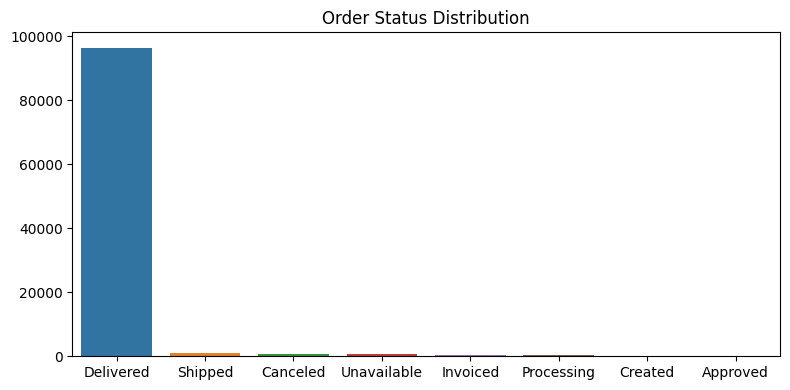

In [31]:
# Get order status distribution
order_status_counts = \
    df_ord_item_cust_sell_prod.groupby(
        ['order_status']
    )['order_id'].nunique().reset_index()

order_status_counts.rename(
    columns={
        'order_id': 'count',
    },
    inplace=True
)
order_status_counts.sort_values(
    ['count'],
    ascending=False,
    inplace=True
)

# Generate bar plot
fig, ax = plt.subplots(figsize = (8, 4))
sns.barplot(
    data=order_status_counts,
    x='order_status',
    y='count',
    ax=ax
)
ax.set_title('Order Status Distribution')
ax.set_xlabel('')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

Almost all orders have already been **delivered**, with a few still in the processing stage.

Next, we will come up with a summarized tally of order volume and sales, which we will use to plot the trends later.

In [32]:
# Merge orders and payments dataset
order_cols = [
    'order_id',
    'order_purchase_timestamp',
    'order_status',
    'order_purchase_year',
    'order_purchase_month'
]
payment_cols = ['order_id', 'payment_type', 'payment_value']
df_ord_pay = pd.merge(
    df_orders[order_cols],
    df_payments[payment_cols],
    on=['order_id'],
    how='left'
)

# Create a dataframe based from the order purchase date range
period_range = pd.period_range(
    df_ord_pay['order_purchase_timestamp'].min(),
    df_ord_pay['order_purchase_timestamp'].max(),
    freq='M'
)
df_period = pd.DataFrame(
    period_range.T,
    columns=['period']
)
df_period['year'] = period_range.year.T
df_period['index'] = period_range.month.T

# Get sales volume by year and month
sales_volume_month = \
    df_ord_pay.groupby(
        ['order_purchase_year', 'order_purchase_month']
    ).agg(
        {
            'order_id': 'nunique',
            'payment_value': 'sum'
        }
    ).reset_index()

# Rename year and month columns
sales_volume_month.rename(
    columns={
        'order_purchase_year': 'year',
        'order_purchase_month': 'month'
    },
    inplace=True
)

# Convert month string into index then sort
sales_volume_month['index'] = pd.DatetimeIndex(
    pd.to_datetime(
        sales_volume_month['month'],
        format='%b'
    )
).month.astype('int64')

# Merge the dataframes
sales_volume_month_full = df_period.merge(
    sales_volume_month,
    on=['year', 'index'],
    how='left'
)

# Sort by order purchase year and month number
sales_volume_month_full.set_index('index', inplace=True)
sales_volume_month_full.sort_values(
    ['year', 'index'],
    inplace=True
)
sales_volume_month_full.rename(
    columns={
        'order_id': 'orders',
        'payment_value': 'sales'
    },
    inplace=True
)

# Fill the empty values
sales_volume_month_full['orders'].fillna(0, inplace=True)
sales_volume_month_full['sales'].fillna(0, inplace=True)
sales_volume_month_full['month'].fillna(
    'Nov',
    inplace=True
)

sales_volume_month_full.style.hide(axis='index')

period,year,month,orders,sales
2016-09,2016,Sep,4.000000,252.240000
2016-10,2016,Oct,324.000000,59090.480000
2016-11,2016,Nov,0.000000,0.000000
2016-12,2016,Dec,1.000000,19.620000
2017-01,2017,Jan,800.000000,138488.040000
2017-02,2017,Feb,1780.000000,291908.010000
2017-03,2017,Mar,2682.000000,449863.600000
2017-04,2017,Apr,2404.000000,417788.030000
2017-05,2017,May,3700.000000,592918.820000
2017-06,2017,Jun,3245.000000,511276.380000


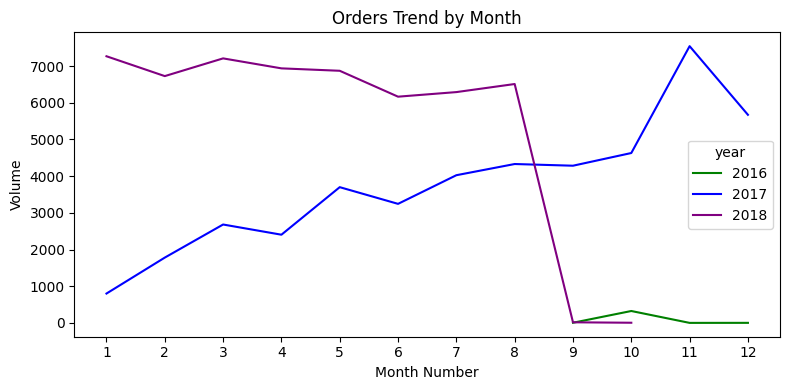

In [33]:
# Plot the order volume trend
fig, ax = plt.subplots(figsize = (8, 4))
sns.lineplot(
    data=sales_volume_month_full,
    x='index',
    y='orders',
    hue='year',
    palette=['green', 'blue', 'purple'],
    ax=ax
)
ax.set_xticks(range(1, 13))
ax.set_title('Orders Trend by Month')
ax.set_xlabel('Month Number')
ax.set_ylabel('Volume')
plt.tight_layout()
plt.show()

From the trend, low order volume was observed in 2016, then it continued to pick up on 2017, with the peak on November. Trend in 2018 was almost flat, though it was generally on a high level.

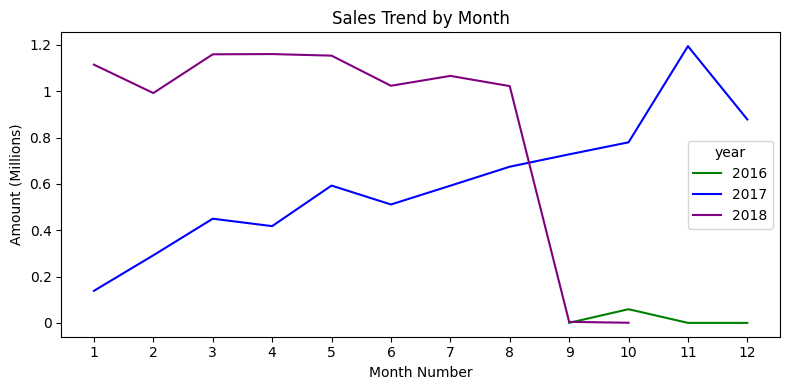

In [34]:
# Plot the sales trend
fig, ax = plt.subplots(figsize = (8, 4))
sns.lineplot(
    data=sales_volume_month_full,
    x='index',
    y='sales',
    hue='year',
    palette=['green', 'blue', 'purple'],
    ax=ax
)

# Adjust the axis tick ranges
scale_y = 1e6
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
ax.yaxis.set_major_formatter(ticks_y)
ax.set_xticks(range(1, 13))
ax.set_title('Sales Trend by Month')
ax.set_xlabel('Month Number')
ax.set_ylabel('Amount (Millions)')
plt.tight_layout()
plt.show()

The sales trend is almost identical with the volume for the same period, suggesting that both metrics are correlated.

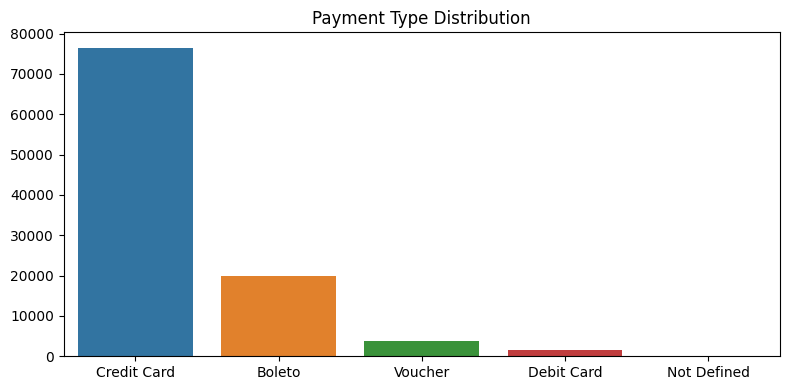

In [35]:
# Get order payment type distribution
payment_type_counts = \
    df_ord_pay.groupby(
        ['payment_type']
    )['order_id'].nunique().reset_index()

payment_type_counts.rename(
    columns={
        'order_id': 'count',
    },
    inplace=True
)
payment_type_counts.sort_values(
    ['count'],
    ascending=False,
    inplace=True
)

# Generate bar plot
fig, ax = plt.subplots(figsize = (8, 4))
sns.barplot(
    data=payment_type_counts,
    x='payment_type',
    y='count',
    ax=ax
)
ax.set_title('Payment Type Distribution')
ax.set_xlabel('')
ax.set_ylabel('')
plt.tight_layout()
plt.show()

By plotting the different payment types, majority were done via **credit card**.

Next, we will investigate the company's delivery performance, by checking out some metrics.

In [36]:
# Add the calculations to determine delivery performance
# Calculate order processing duration in minutes
df_ord_item_cust_sell_prod['process_duration'] = (
    df_ord_item_cust_sell_prod['order_approved_at'] - \
    df_ord_item_cust_sell_prod['order_purchase_timestamp']
).astype('timedelta64[m]')

# Calculate duration of sending order to carrier in days
df_ord_item_cust_sell_prod['sent_to_carrier_duration'] = (
    df_ord_item_cust_sell_prod['order_delivered_carrier_date'] - \
    df_ord_item_cust_sell_prod['order_approved_at']
).apply(lambda x: x.days)

# Calculate duration of delivering order to customer in days
df_ord_item_cust_sell_prod['deliver_to_customer_duration'] = (
    df_ord_item_cust_sell_prod['order_delivered_customer_date'] - \
    df_ord_item_cust_sell_prod['order_delivered_carrier_date']
).apply(lambda x: x.days)

# Calculate difference between carrier estimate and actual order delivery
df_ord_item_cust_sell_prod['carrier_delivery_diff'] = (
    df_ord_item_cust_sell_prod['order_estimated_delivery_date'] - \
    df_ord_item_cust_sell_prod['order_delivered_customer_date']
).apply(lambda x: x.days)

# Calculate difference between seller estimate and actual order delivery
df_ord_item_cust_sell_prod['seller_delivery_diff'] = (
    df_ord_item_cust_sell_prod['shipping_limit_date'] - \
    df_ord_item_cust_sell_prod['order_delivered_carrier_date']
).apply(lambda x: x.days)

Having the calculations ready, we then classify the carrier's performance based on the estimate and actual delivery times.

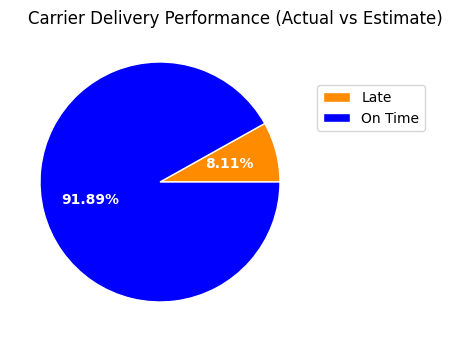

In [37]:
# Bin the data based on carrier estimate and actual order delivery
df_ord_item_cust_sell_prod.loc[
    df_ord_item_cust_sell_prod['carrier_delivery_diff'] < 0,
    'delivery'
] = 'Late'
df_ord_item_cust_sell_prod.loc[
    df_ord_item_cust_sell_prod['carrier_delivery_diff'] >= 0,
    'delivery'
] = 'On Time'

# Get the counts
carrier_delivery = \
    df_ord_item_cust_sell_prod.groupby(
        'delivery'
    )['order_id'].nunique().reset_index()
carrier_delivery.rename(
    columns={
        'order_id': 'count'
    },
    inplace=True
)

# Visualize the carrier delivery performance
colors = ['darkorange', 'blue']
fig, ax = plt.subplots(figsize=(4, 4))
patches, texts, pcts = ax.pie(
    carrier_delivery['count'],
    autopct='%.2f%%',
    colors=colors,
    wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},
    textprops={'fontsize': 10}
)
plt.legend(
    carrier_delivery['delivery'],
    bbox_to_anchor=(0.75, 0.75),
    fontsize=10, 
    bbox_transform=plt.gcf().transFigure
)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.75)
plt.setp(pcts, color='white', fontweight=600)
ax.set_title(
    'Carrier Delivery Performance (Actual vs Estimate)',
    x=0.75
)
plt.show()

Here, late deliveries by the carrier to the customer is less than 10%.

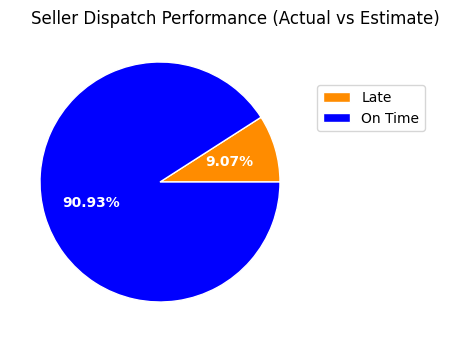

In [38]:
# Bin the data based on seller estimate and actual order dispatch
df_ord_item_cust_sell_prod.loc[
    df_ord_item_cust_sell_prod['seller_delivery_diff'] < 0,
    'delivery'
] = 'Late'
df_ord_item_cust_sell_prod.loc[
    df_ord_item_cust_sell_prod['seller_delivery_diff'] >= 0,
    'delivery'
] = 'On Time'

# Get the counts
seller_delivery = \
    df_ord_item_cust_sell_prod.groupby(
        'delivery'
    )['order_id'].nunique().reset_index()
seller_delivery.rename(
    columns={
        'order_id': 'count'
    },
    inplace=True
)

# Visualize the seller dispatch performance
colors = ['darkorange', 'blue']
fig, ax = plt.subplots(figsize=(4, 4))
patches, texts, pcts = ax.pie(
    seller_delivery['count'],
    autopct='%.2f%%',
    colors=colors,
    wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},
    textprops={'fontsize': 10}
)
plt.legend(
    seller_delivery['delivery'],
    bbox_to_anchor=(0.75, 0.75),
    fontsize=10, 
    bbox_transform=plt.gcf().transFigure
)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.75)
plt.setp(pcts, color='white', fontweight=600)
ax.set_title(
    'Seller Dispatch Performance (Actual vs Estimate)',
    x=0.75
)
plt.show()

Similarly, late dispatch by the seller to the carrier is less than 10%, though slightly higher than the carrier late deliveries. Due to the late deliveries of the seller, consequently it also affects the delivery times of the carrier.

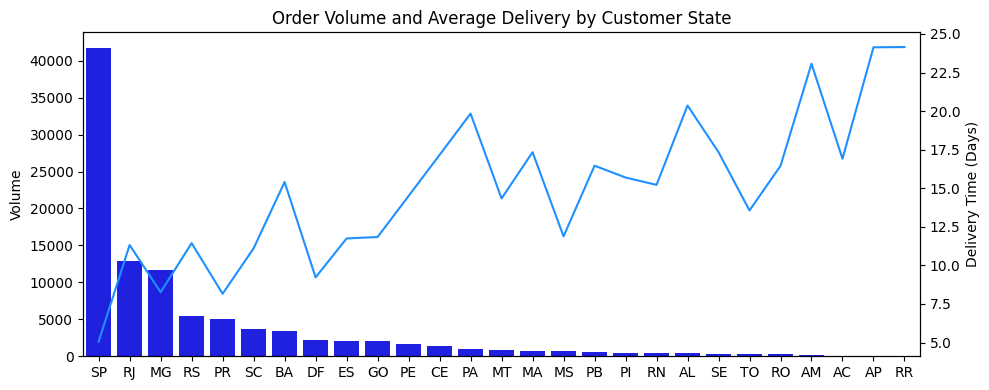

In [39]:
# Get order volume and average delivery time by customer state
order_volume_delivery = \
    df_ord_item_cust_sell_prod.groupby(
        ['customer_state']
    ).agg(
        {
            'order_id': 'nunique',
            'deliver_to_customer_duration': 'mean'
        }
    ).reset_index()

order_volume_delivery.rename(
    columns={
        'order_id': 'count',
        'deliver_to_customer_duration': 'average_days'
    },
    inplace=True
)
order_volume_delivery.sort_values(
    ['count'],
    ascending=False,
    inplace=True
)

# Generate line and bar graphs
fig, ax1 = plt.subplots(figsize=(10, 4))
ax2 = ax1.twinx()
sns.lineplot(
    data=order_volume_delivery,
    x='customer_state',
    y='average_days',
    color='dodgerblue',
    ax=ax2
)
sns.barplot(
    data=order_volume_delivery,
    x='customer_state',
    y='count',
    palette=['blue'],
    ax=ax1
)
ax1.set_title('Order Volume and Average Delivery by Customer State')
ax1.set_xlabel('')
ax1.set_ylabel('Volume')
ax2.set_ylabel('Delivery Time (Days)')
plt.tight_layout()
plt.show()

From the plot, the state of Sao Paulo (SP) has the highest order volume, while the state of Roraima (RR) has the lowest. Conversely, Roraima is the state with the longest delivery time, and Sao Paulo has the shortest.

We will then proceed with investigating the product quality factor.

In [40]:
# Merge orders, reviews, order items and products dataset
order_cols = [
    'order_id',
    'order_purchase_timestamp',
    'order_status',
    'order_purchase_year',
    'order_purchase_month'
]
order_item_cols = [
    'order_id',
    'product_id'
]

df_ord_review = pd.merge(
    df_orders[order_cols],
    df_reviews,
    on=['order_id'],
    how='left'
)
df_ord_review_item = pd.merge(
    df_ord_review,
    df_items[order_item_cols],
    on=['order_id'],
    how='left'
)
df_ord_review_item_prod = df_ord_review_item.merge(
    df_prod_trans,
    on=['product_id'],
    how='left'
)

# Drop columns
drop_cols = [
    'review_comment_title',
    'product_id'
]
df_ord_review_item_prod.drop(
    drop_cols,
    axis=1,
    inplace=True
)

df_ord_review_item_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114092 entries, 0 to 114091
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  114092 non-null  object        
 1   order_purchase_timestamp  114092 non-null  datetime64[ns]
 2   order_status              114092 non-null  object        
 3   order_purchase_year       114092 non-null  int64         
 4   order_purchase_month      114092 non-null  object        
 5   review_id                 113131 non-null  object        
 6   review_score              113131 non-null  float64       
 7   review_comment_message    48166 non-null   object        
 8   review_creation_date      113131 non-null  object        
 9   review_answer_timestamp   113131 non-null  object        
 10  product_category_name     111678 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usag

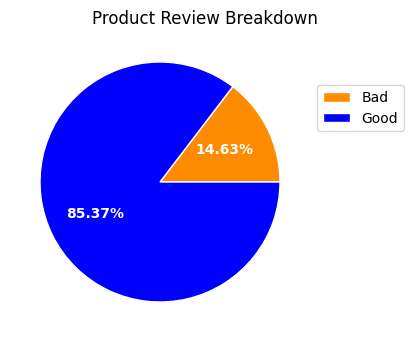

In [41]:
# Bin the data based on review score
df_ord_review_item_prod.loc[
    df_ord_review_item_prod['review_score'] < 3,
    'review'
] = 'Bad'
df_ord_review_item_prod.loc[
    df_ord_review_item_prod['review_score'] >= 3,
    'review'
] = 'Good'

# Get the counts
review_breakdown = \
    df_ord_review_item_prod.groupby(
        'review'
    )['review_id'].nunique().reset_index()
review_breakdown.rename(
    columns={
        'review_id': 'count'
    },
    inplace=True
)

# Visualize the review breakdown
colors = ['darkorange', 'blue']
fig, ax = plt.subplots(figsize=(4, 4))
patches, texts, pcts = ax.pie(
    review_breakdown['count'],
    autopct='%.2f%%',
    colors=colors,
    wedgeprops={'linewidth': 1.0, 'edgecolor': 'white'},
    textprops={'fontsize': 10}
)
plt.legend(
    review_breakdown['review'],
    bbox_to_anchor=(0.75, 0.75),
    fontsize=10, 
    bbox_transform=plt.gcf().transFigure
)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.75)
plt.setp(pcts, color='white', fontweight=600)
ax.set_title(
    'Product Review Breakdown',
    x=0.65
)
plt.show()

In [42]:
# Create a dataframe based from the order purchase date range
period_range = pd.period_range(
    df_ord_pay['order_purchase_timestamp'].min(),
    df_ord_pay['order_purchase_timestamp'].max(),
    freq='M'
)
df_period = pd.DataFrame(
    period_range.T,
    columns=['period']
)
df_period['year'] = period_range.year.T
df_period['index'] = period_range.month.T

# Get average review score by year and month
reviews_month = \
    df_ord_review_item_prod.groupby(
        ['order_purchase_year', 'order_purchase_month']
    )['review_score'].mean().reset_index()

# Rename year and month columns
reviews_month.rename(
    columns={
        'order_purchase_year': 'year',
        'order_purchase_month': 'month'
    },
    inplace=True
)

# Convert month string into index then sort
reviews_month['index'] = pd.DatetimeIndex(
    pd.to_datetime(
        reviews_month['month'],
        format='%b'
    )
).month.astype('int64')

# Merge the dataframes
reviews_month_full = df_period.merge(
    reviews_month,
    on=['year', 'index'],
    how='left'
)

# Sort by order purchase year and month number
reviews_month_full.set_index('index', inplace=True)
reviews_month_full.sort_values(
    ['year', 'index'],
    inplace=True
)
reviews_month_full.rename(
    columns={
        'review_score': 'average_score'
    },
    inplace=True
)

# Fill the empty values
reviews_month_full['average_score'].ffill(inplace=True)
reviews_month_full['month'].fillna(
    'Nov',
    inplace=True
)

reviews_month_full.style.hide(axis='index')

period,year,month,average_score
2016-09,2016,Sep,1.000000
2016-10,2016,Oct,3.503979
2016-11,2016,Nov,3.503979
2016-12,2016,Dec,5.000000
2017-01,2017,Jan,4.049689
2017-02,2017,Feb,3.996995
2017-03,2017,Mar,4.029334
2017-04,2017,Apr,3.997018
2017-05,2017,May,4.115256
2017-06,2017,Jun,4.116607


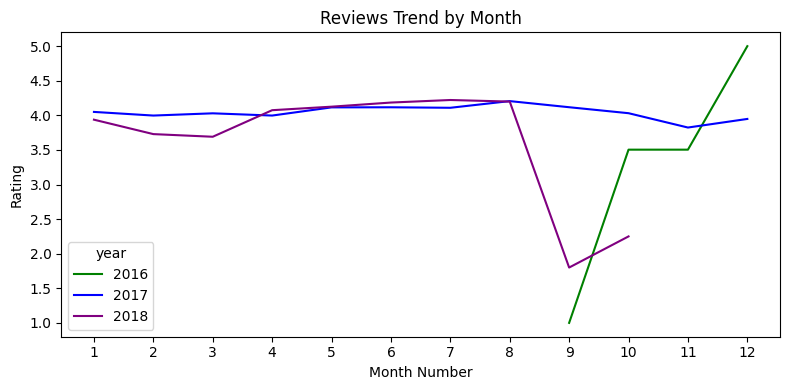

In [43]:
# Plot the reviews trend
fig, ax = plt.subplots(figsize = (8, 4))
sns.lineplot(
    data=reviews_month_full,
    x='index',
    y='average_score',
    hue='year',
    palette=['green', 'blue', 'purple'],
    ax=ax
)
ax.set_xticks(range(1, 13))
ax.set_title('Reviews Trend by Month')
ax.set_xlabel('Month Number')
ax.set_ylabel('Rating')
plt.tight_layout()
plt.show()

In [44]:
# Get average review score by product category
reviews_category = \
    df_ord_review_item_prod.groupby(
        ['product_category_name']
    )['review_score'].mean().reset_index()

# Sort by the lowest score
reviews_category.sort_values(
    ['review_score'],
    inplace=True
)
reviews_category.rename(
    columns={
        'review_score': 'average_score'
    },
    inplace=True
)

# Show the top 10 products with the lowest average score
reviews_category.head(10).style.hide(axis='index')

product_category_name,average_score
Security And Services,2.500000
Diapers And Hygiene,3.256410
Office Furniture,3.493183
Home Comfort 2,3.629630
Fashion Male Clothing,3.641221
Fixed Telephony,3.683206
Party Supplies,3.767442
Fashio Female Clothing,3.780000
Furniture Mattress And Upholstery,3.815789
Audio,3.825485
